In [437]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [606]:
df = pd.read_csv('training_data.csv')

In [607]:
FM = df.values
dim = np.shape(FM)

In [608]:
x = np.linspace(0,1,n_nodes)

In [609]:
#ignore rotations and moments

F = FM[:,0:int(dim[1]/2)]
F = F[::10,0::2]
F = F/abs(F).max()
D = FM[:,int(dim[1]/2):] 
D = D[::10,0::2]
D = D/abs(D).max()


In [610]:
n_timesteps, n_nodes = np.shape(D)
d = 200 #number of steps in "model memory"
t = d

In [611]:
FL = np.zeros([n_timesteps+d, len(F[0,:])])
FL[d:,:] = F
DL = np.zeros([n_timesteps+d, len(F[0,:])])
DL[d:,:] = D

In [612]:
#Training data



#X_train = np.zeros([n_timesteps-2*d, 2*d*n_nodes+d*n_nodes])
#Y_train = np.zeros([n_timesteps-2*d, d*n_nodes])

X_train = np.zeros([n_timesteps, (d+1)*n_nodes])
Y_train = np.zeros([n_timesteps, n_nodes])


t=d
for i in range(n_timesteps-1):
    
    bulk = 0
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d+1] = FL[t-d:t+1,j]    
        bulk += d+1
    
    #for j in range(n_nodes):
    #    X_train[i, bulk:bulk + d] = D[t-d:t,j]
    #    bulk += d
    
    #for j in range(n_nodes):
     #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
      #  bulk += d
    #test_bulk = 0
    #for j in range(n_nodes):
    #    Y_train[i, test_bulk:test_bulk+d] = D[t:t+d, j]
    #    test_bulk += d
    
    Y_train[i, :] = DL[t, :]
    t += 1


In [613]:
#X_train_total = X_train

In [614]:
X_train_total = np.concatenate((X_train_total,X_train))

In [ ]:
#X_train = X_train_total

In [662]:
######## BEGIN HERE ########

#Read training data from matlab
df_x = pd.read_csv('x_train.csv')
df_y = pd.read_csv('y_train.csv')

X_train = df_x.values
Y_train = df_y.values

n_timesteps = len(X_train[:,0])

In [663]:
#Neural network architecture
train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

n_timesteps = len(X_train[:,0])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

In [666]:
def get_error(predictions, y_test):
    #Total error
    error = 0
    for i in range(len(predictions[:,0])):
        #for j in range(d):
        error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
    
    return error

In [667]:
#Custom loss function

def independent_loss(y_true, y_pred):
    
    input_i = np.copy(x_train[0,:])

    dz = np.copy(input_i[d*n_nodes:])

    dz = np.reshape(dz, (n_nodes, d))


    #dzt = np.copy(input_i[d+1+n_nodes*d:])
    #dzt = np.reshape(dzt, (n_nodes, d))

    preds = np.zeros([len(x_test[:,0]), n_nodes*d])
    force = np.copy(x_test[:, 0:(d+1)*n_nodes])

    for i in range(len(x_test[:,0])):

    
        pred = model.predict(np.reshape(input_i,(1,len(input_i))))
        preds[i, :] = pred[0,:]

        input_i[0:(d+1)*n_nodes] = force[i+1,:]
        #input_i[(d+1)*n_nodes:] = pred[0,:]

        #dz = np.delete(dz, 0, 1)
        #dz = np.concatenate((dz, np.reshape(pred[0,0::d], (1,n_nodes)).T), axis=1)
        #dz[0,:] = np.zeros(d)
        #dzt = np.delete(dzt, 0, 1)
        #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
        #dzt[0,:] = np.zeros(n_nodes)
        #input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
        input_i[d*n_nodes:] = pred[0,:]
        #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]

    
    total_error = get_error(preds, y_true)
    
    
    return total_error

In [670]:
#INITIALIZE NEURAL NETWORK

#Neural network
def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss=independent_loss, optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=100, verbose = 1)

ValueError: cannot reshape array of size 21 into shape (21,200)

In [638]:
model.save('beam_model.h5')

In [639]:
#### CONTINUE TRAINING ####
model = load_model('beam_model.h5')

model.fit(x_train, y_train, epochs=100, verbose=1)

model.save('beam_model.h5')

#del(model)

Epoch 1/100
2407/2407 [==============================] - 2s 1ms/step - loss: 0.0014
Epoch 2/100
2407/2407 [==============================] - 2s 991us/step - loss: 7.0110e-04
Epoch 3/100
2407/2407 [==============================] - 2s 1ms/step - loss: 6.4175e-04
Epoch 4/100
2407/2407 [==============================] - 3s 1ms/step - loss: 5.6425e-04
Epoch 5/100
2407/2407 [==============================] - 3s 1ms/step - loss: 5.5083e-04
Epoch 6/100
2407/2407 [==============================] - 3s 1ms/step - loss: 4.7095e-04
Epoch 7/100
2407/2407 [==============================] - 3s 1ms/step - loss: 4.7510e-04
Epoch 8/100
2407/2407 [==============================] - 3s 1ms/step - loss: 4.7726e-04
Epoch 9/100
2407/2407 [==============================] - 2s 1ms/step - loss: 4.7951e-04
Epoch 10/100
2407/2407 [==============================] - 3s 1ms/step - loss: 3.8982e-04
Epoch 11/100
2407/2407 [==============================] - 3s 1ms/step - loss: 4.0950e-04
Epoch 12/100
2407/2407 [========

In [649]:
predictions = model.predict(x_test)

In [648]:
height= 200
model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))

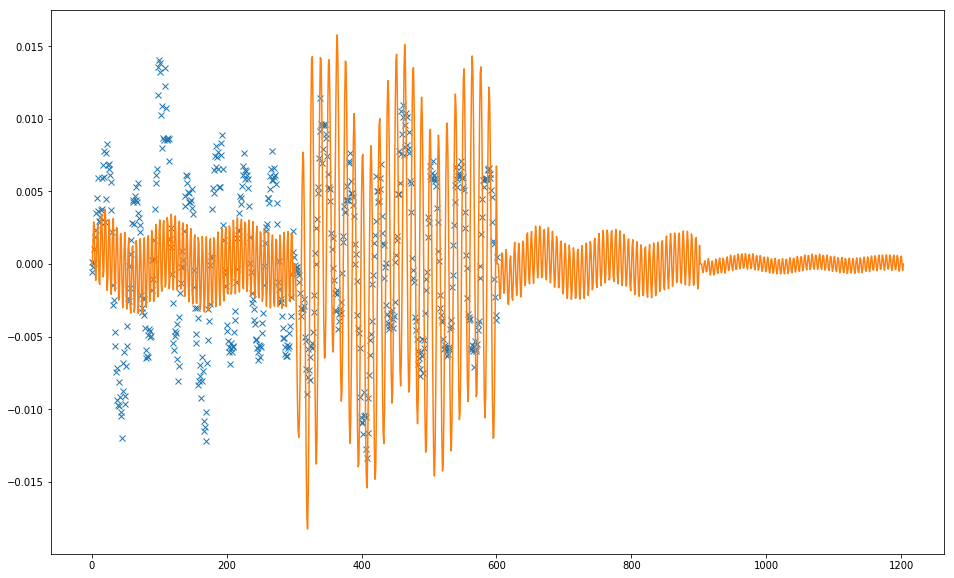

In [665]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:, -1], 'x')
plt.plot(y_test[:, -1])
plt.show()

In [526]:
#Errorfunction
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [527]:
#Error
print(rmse(predictions[:,n_nodes-1], y_test[:,n_nodes-1]))

0.112812835845


In [642]:
#Total error
error = 0
for i in range(len(predictions[:,0])):
    #for j in range(d):
    error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
print(error)

0.0429341900596


In [643]:
predictions = model.predict(X_train)

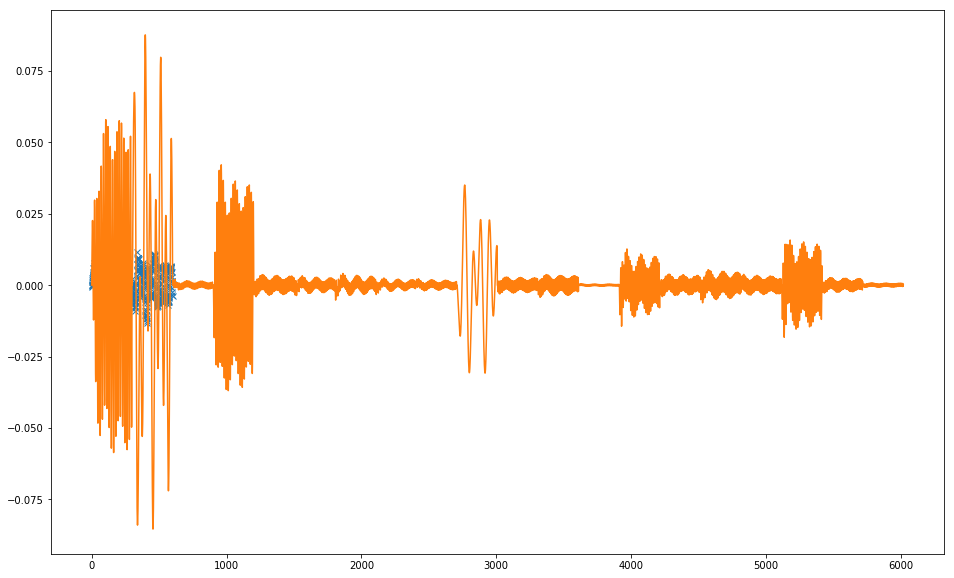

In [664]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,-1], 'x')
plt.plot(Y_train[:, -1])
plt.show()

In [239]:
#independent prediction

input_i = np.copy(x_test[0,:])

#dz = np.copy(input_i[(2*d)*n_nodes:])

#dz = np.reshape(dz, (n_nodes, d))


#dzt = np.copy(input_i[d+1+n_nodes*d:])
#dzt = np.reshape(dzt, (n_nodes, d))

preds = np.zeros([int(len(x_test[:,0])/10), n_nodes*d])
force = np.copy(x_test[:, 0:2*d*n_nodes])

for i in range(int(len(x_test[:,0])/10)):
    
    
    pred = model.predict(np.reshape(input_i,(1,len(input_i))))
    preds[i, :] = pred[0,:]
    
    input_i[0:2*d*n_nodes] = force[i*d+d,:]
    #input_i[(d+1)*n_nodes:] = pred[0,:]
    
    #dz = np.delete(dz, 0, 1)
    #dz = np.concatenate((dz, np.reshape(pred[0,0::d], (1,n_nodes)).T), axis=1)
    #dz[0,:] = np.zeros(d)
    #dzt = np.delete(dzt, 0, 1)
    #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
    #dzt[0,:] = np.zeros(n_nodes)
    #input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
    input_i[2*d*n_nodes:] = pred[0,:]
    #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]
    

    

In [645]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")